In [35]:
import os
import pandas as pd
import pylab as plt
import seaborn as sns

file = '1873L_Counts.csv'
df = pd.read_csv(file, skiprows=3)

df['Time'] = df['Day'] * 24 + df['Hr'] + df['Min'] / 60
print(df)

       Day  Hr  Min  Cnts/min  Lights         Time
0        1   6    0       NaN     NaN    30.000000
1        1   6    5       NaN     NaN    30.083333
2        1   6   10       NaN     NaN    30.166667
3        1   6   15       NaN     NaN    30.250000
4        1   6   20       NaN     NaN    30.333333
...    ...  ..  ...       ...     ...          ...
18535   65  14   35       0.0   212.2  1574.583333
18536   65  14   40       0.0   215.0  1574.666667
18537   65  14   45       0.0   211.4  1574.750000
18538   65  14   50       0.0   215.0  1574.833333
18539   65  14   55       0.0   209.8  1574.916667

[18540 rows x 6 columns]


66


Text(0.5, 1.0, '1873L_Counts')

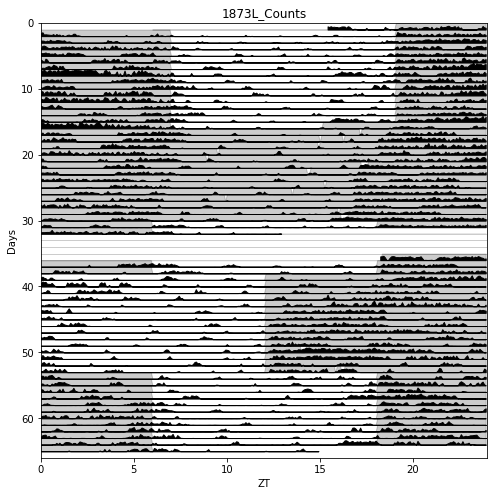

In [60]:
# Plot the data
# Plot each day at a time
ndays = int(plt.ceil(df['Time'].max() / 24))
print(ndays)

# Iterate through each day.
plt.figure(figsize=(8, 8))

for i in range(ndays):
    subset = df[(df['Time']>=(i * 24)) & (df['Time'] < ((i + 1) * 24))]
    x = subset['Time'] - i * 24
    y = subset['Cnts/min']
    l = plt.zeros((subset.shape[0]))
    l[subset['Lights'] == 0] = 1
    plt.fill_between(x, i, i - l, color='k', alpha=.2)
    plt.fill_between(x, i, i - y/100, color='k')
    

plt.xlim(0, 24)
plt.ylim(ndays, 0)
plt.xlabel('ZT')
plt.ylabel('Days')
plt.yticks(plt.arange(0, ndays, 10))
plt.title(file.split(".")[0])